In [1]:
import tensorflow_core as tf
import matplotlib.pyplot as plt
import numpy as np

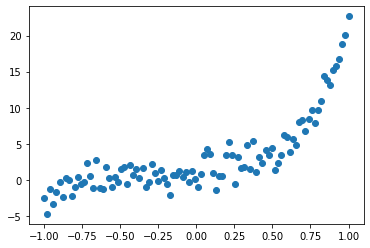

In [2]:
learning_rate = 0.01
training_epochs = 40
reg_lambda = 0.

x_dataset
x_train = np.linspace(-1, 1, 100)

y_train_coeffs = [1, 2, 3, 4, 5, 6]
y_train = 0

for i in range(len(y_train_coeffs)):
    y_train += y_train_coeffs[i] * np.power(x_train, i)

y_train += np.random.randn(*x_train.shape) * 1.5 # add noise

# plot the data
plt.scatter(x_train, y_train)
plt.show()

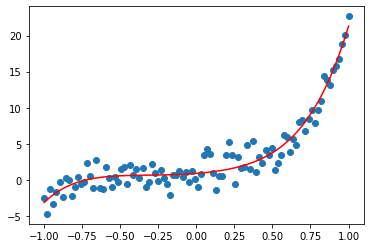

In [7]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(len(y_train_coeffs)):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * len(y_train_coeffs), name="parameters")
y_model = model(X, w)

cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
sess.close()

plt.scatter(x_train, y_train)

y_learned = 0
for i in range(len(y_train_coeffs)):
    y_learned += w_val[i] * np.power(x_train, i)

plt.plot(x_train, y_learned, "r")
plt.show()